In [1]:
import os, sys
import numpy as np
import corner

sys.path.append('../')
import py21cmfish as p21fish

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mathtext as mathtext
import matplotlib.lines as mlines

%matplotlib inline

plt.style.use(['default','seaborn','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['figure.figsize'] = (4,3)
mpl.rcParams['figure.dpi'] = 150


DIRFISH='/Users/julian/Dropbox/Research/21/21cmFAST_ETHOS/21cmfish-master/docs/source/tutorials/'
if os.path.exists(DIRFISH+'/code/matplotlibrc'):
    from matplotlib import rc_file
    rc_file(DIRFISH+'/code/matplotlibrc')

    mathtext.FontConstantsBase.sup1 = 0.5
    mathtext.FontConstantsBase.sub1 = 0.2
    mathtext.FontConstantsBase.sub2 = 0.2

In [2]:
# Color palette
from palettable.tableau import Tableau_20, ColorBlind_10
cols = ColorBlind_10.hex_colors

col_pess  = cols[6]
col_mod   = cols[0]
col_alpha = 'k'
col_mcmc  = cols[3]
col_P19   = cols[1]

In [3]:
%load_ext autoreload
%autoreload 2

# 21cmfish examples

This notebook loads and plots example posteriors based on the 21cm power spectrum.

To run the notebook you must first unpack the data directories in `/examples/`

1. [EOS21 - CDM fiducial with pop II and pop III galaxies](#EOS21)
2. [Comparison with Park+19](#Comparison-to-Park+19)
3. [Adding your own new parameter](#Adding-a-new-parameter)

In [4]:
examples_dir = p21fish.base_path+'examples/'
data_dir     = examples_dir+'data/'
noise_dir    = data_dir+'21cmSense_noise/'

# EOS21

This is a fiducial case from [Munoz+2021](#) with CDM, and with both pop II and pop III galaxies.

In [5]:
# Find the parameters we varied and fiducials from the config file
# but you could also list these yourself (especially if you want to change the order)
astro_params_vary, astro_params_fid = p21fish.get_params_fid(
                                        config_file=p21fish.base_path+'21cmFAST_config_files/EoS_mini.config')

print('Varying parameters:',astro_params_vary)
print('Fiducial parameter values:',astro_params_fid)

assert type(astro_params_vary) == list, 'astro_params_vary must be a list'
assert type(astro_params_fid) == dict, 'astro_params_vary must be a dict'

Varying parameters: ['ALPHA_STAR', 'F_STAR10', 'ALPHA_ESC', 'F_ESC10', 'ALPHA_STAR_MINI', 'F_STAR7_MINI', 'F_ESC7_MINI', 'L_X', 'NU_X_THRESH', 'A_LW']
Fiducial parameter values: {'ALPHA_ESC': -0.3, 'F_ESC10': -1.35, 'ALPHA_STAR': 0.5, 'F_STAR10': -1.25, 't_STAR': 0.5, 'F_STAR7_MINI': -2.5, 'ALPHA_STAR_MINI': 0.0, 'F_ESC7_MINI': -1.35, 'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 500.0, 'A_VCB': 1.0, 'A_LW': 2.0}


In [6]:
##JBM And the difference case

# Find the parameters we varied and fiducials from the config file
# but you could also list these yourself (especially if you want to change the order)
astro_params_vary_diff, astro_params_fid_diff = p21fish.get_params_fid(
                                        config_file=p21fish.base_path+'21cmFAST_config_files/EoS_mini_diff.config')

print('Varying parameters:',astro_params_vary_diff)
print('Fiducial parameter values:',astro_params_fid_diff)

assert type(astro_params_vary_diff) == list, 'astro_params_vary must be a list'
assert type(astro_params_fid_diff) == dict, 'astro_params_vary must be a dict'

Varying parameters: []
Fiducial parameter values: {'ALPHA_ESC': -0.3, 'F_ESC10': -1.25, 'ALPHA_STAR': 0.5, 'F_STAR10': -1.35, 't_STAR': 0.5, 'F_STAR7_MINI': -2.25, 'ALPHA_STAR_MINI': 0.0, 'F_ESC7_MINI': -1.35, 'L_X': 40.5, 'L_X_MINI': 40.5, 'NU_X_THRESH': 550.0, 'A_VCB': 1.0, 'A_LW': 2.0}


## Load parameters

### Moderate noise

In [7]:
# Load each parameter into a dictionary
params_EoS = {}
astro_params_vary_EoS = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC', 
                         'F_STAR7_MINI', 'ALPHA_STAR_MINI', 'F_ESC7_MINI', 'L_X', 'NU_X_THRESH', 'A_LW']

for param in astro_params_vary_EoS:
    params_EoS[param] = p21fish.Parameter(param=param, 
                                          output_dir=data_dir+'EOS21/', 
                                          PS_err_dir=noise_dir+'21cmSense_fid_EOS21/',
                                          clobber=False, Park19=None,
                                          vb=False)

########### fisher set up for F_STAR10
Fiducial: F_STAR10=-1.25
########### fisher set up for ALPHA_STAR
Fiducial: ALPHA_STAR=0.5
########### fisher set up for F_ESC10
Fiducial: F_ESC10=-1.35
########### fisher set up for ALPHA_ESC
Fiducial: ALPHA_ESC=-0.3
########### fisher set up for F_STAR7_MINI
Fiducial: F_STAR7_MINI=-2.5
########### fisher set up for ALPHA_STAR_MINI
Fiducial: ALPHA_STAR_MINI=0.0
########### fisher set up for F_ESC7_MINI
Fiducial: F_ESC7_MINI=-1.35
########### fisher set up for L_X
Fiducial: L_X=40.5
########### fisher set up for NU_X_THRESH
Fiducial: NU_X_THRESH=500.0
########### fisher set up for A_LW
Fiducial: A_LW=2.0


### Pessimistic noise

In [8]:
# Load each parameter into a dictionary
params_EoS_pess = {}

for param in astro_params_vary_EoS:
    params_EoS_pess[param] = p21fish.Parameter(param=param, 
                                          output_dir=data_dir+'EOS21/', 
                                          PS_err_dir=noise_dir+'21cmSense_pess_EOS21/',
                                          clobber=False, Park19=None,
                                          vb=False)

########### fisher set up for F_STAR10
Fiducial: F_STAR10=-1.25
########### fisher set up for ALPHA_STAR
Fiducial: ALPHA_STAR=0.5
########### fisher set up for F_ESC10
Fiducial: F_ESC10=-1.35
########### fisher set up for ALPHA_ESC
Fiducial: ALPHA_ESC=-0.3
########### fisher set up for F_STAR7_MINI
Fiducial: F_STAR7_MINI=-2.5
########### fisher set up for ALPHA_STAR_MINI
Fiducial: ALPHA_STAR_MINI=0.0
########### fisher set up for F_ESC7_MINI
Fiducial: F_ESC7_MINI=-1.35
########### fisher set up for L_X
Fiducial: L_X=40.5
########### fisher set up for NU_X_THRESH
Fiducial: NU_X_THRESH=500.0
########### fisher set up for A_LW
Fiducial: A_LW=2.0


## Fisher matrix analysis

`make_fisher_matrix()` creates the Fisher matrix and its inverse from a Parameters dictionary. The resulting ellipses can be plotted with `plot_triangle()`.

In [9]:
Fij_matrix_PS, Finv_PS = p21fish.make_fisher_matrix(params_EoS, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=0.1, k_max=1, 
                                                     z_min=5.7, z_max=30., 
                                                     sigma_mod_frac=0.2,
                                                     add_sigma_poisson=True)

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

PS shape: (20, 24)


In [10]:
# Load each parameter into a dictionary
params_alt = [p21fish.Parameter(param=param, 
                                          output_dir=data_dir+'EOS21/', 
                                          PS_err_dir=noise_dir+'21cmSense_pess_EOS21/',
                                          clobber=False, Park19=None,
                                          vb=False)]

########### fisher set up for A_LW
Fiducial: A_LW=2.0


In [11]:
# p21fish.plot_triangle(params=astro_params_vary_EoS, 
#                       fiducial=fid_params,
#                       labels=fid_labels,
#                       cov=Finv_PS,
#                       ellipse_color=col_mod,
#                       title_fontsize=14,
#                       xlabel_kwargs={'labelpad': 5, 'fontsize':22},
#                       ylabel_kwargs={'labelpad': 5, 'fontsize':22},
#                       fig_kwargs={'figsize':(18,18)});

# plt.savefig(examples_dir+'corner_EoS_mini_fisher.png', bbox_inches='tight')

## Calculate parameter Difference

In [12]:
# ##TODO, does fidonly work?
# params_EoS_diff = {}
# astro_params_vary_EoS_diff = astro_params_vary_EoS

# for param in astro_params_vary_EoS_diff:
#     params_EoS_diff[param] = p21fish.Parameter(param=param, 
#                                           output_dir=data_dir+'EOS21/', 
#                                           PS_err_dir=noise_dir+'21cmSense_fid_EOS21/',
#                                           clobber=False, Park19=None,
#                                           vb=False,
#                                           fidonly=True)
    
# #next is to use the new box to see if it works with fidonly or I have to tweak further

In [13]:
# ##Try with park19.
# ##ISSUE: Different k and z

# output_dir_Park19 = data_dir+'Park19/'
# PS_err_dir_Park19 = noise_dir+'21cmSense_noise_Park19/'
        
# astro_params_vary_Park19, astro_params_fid_Park19 = p21fish.get_params_fid(
#                                                     config_file=p21fish.base_path+'21cmFAST_config_files/Park19.config')

# # Reorder to match Park+19
# astro_params_vary_Park19 = ['F_STAR10', 'ALPHA_STAR',
#                              'F_ESC10', 'ALPHA_ESC', 
#                              'M_TURN', 't_STAR', 
#                              'L_X', 'NU_X_THRESH']

# astro_params_vary_Park19_todiff = ['F_STAR10', 'ALPHA_STAR',
#                              'F_ESC10', 'ALPHA_ESC', 
#                              'L_X', 'NU_X_THRESH']

# #astro_params_vary_Park19 = astro_params_vary_EoS_diff

# # Load parameters
# params_Park19 = {}
# for param in astro_params_vary_Park19:
        
#     params_Park19[param] = p21fish.Parameter(param=param, 
#                                              output_dir=output_dir_Park19,
#                                              HII_DIM=128, BOX_LEN=250,
#                                              min_redshift=5.9,
#                                              PS_err_dir=PS_err_dir_Park19,
#                                              clobber=False, Park19='real',
#                                              vb=False,
#                                              fidonly=True)

# #next is to use the new box to see if it works with fidonly or I have to tweak further

In [14]:
#First an example where we input the variation by hand

PS_EoS = params_EoS[astro_params_vary_EoS[0]].PS_fid
d1 = params_EoS[astro_params_vary_EoS[0]].deriv_PS['CDM']
d2 = params_EoS[astro_params_vary_EoS[3]].deriv_PS['CDM']

PS_altered = PS_EoS + 1.4*d1 - 3.6*d2


Di_vector = p21fish.make_diff_array(params_EoS, PS_altered, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=0.1, k_max=1, 
                                                     z_min=5.7, z_max=30., 
                                                     sigma_mod_frac=0.2,
                                                     add_sigma_poisson=True)

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

PS shape: (20, 24)


In [15]:
#print(Di_vector)
param_variations = np.dot(Finv_PS,Di_vector)
print(param_variations)

[ 1.40000000e+00  4.54747351e-13  9.09494702e-13 -3.60000000e+00
 -1.81898940e-12 -2.27373675e-12  0.00000000e+00  0.00000000e+00
 -2.91038305e-11 -7.27595761e-12]


In [18]:
#Now read an alternative parameter set, close by
KMINALT=0.1
KMAXALT=0.99

params_use = params_EoS
##params_use = params_EoS_pess

Fij_matrix_PS_KMIN, Finv_PS_KMIN = p21fish.make_fisher_matrix(params_use, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=KMINALT, k_max=KMAXALT, 
                                                     z_min=5.7, z_max=30., 
                                                     sigma_mod_frac=0.2,
                                                     add_sigma_poisson=True)


PS_altered = np.load(data_dir+'EoS_mini_vary_same_ICs/power_spectrum_fid_21cmsense.npy', allow_pickle=True)

Di_vector = p21fish.make_diff_array(params_use, PS_altered, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=KMINALT, k_max=KMAXALT, 
                                                     z_min=5.7, z_max=30., 
                                                     sigma_mod_frac=0.2,
                                                     add_sigma_poisson=True)

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

param_variations = np.dot(Finv_PS_KMIN,Di_vector)

for il,label in enumerate(fid_labels):
    print(f'Change in {label} : {param_variations[il]}')
    print(f'Error is {np.sqrt(Finv_PS_KMIN[il,il])}')


PS shape: (20, 24)
PS shape: (20, 24)
Change in $\log_{10}f_{\star,10}$ : 0.10810601499659489
Error is 0.1844302113623959
Change in $\alpha_\star^{II}$ : 0.08328153461526488
Error is 0.16831709724113297
Change in $\log_{10}f_\mathrm{esc,10}$ : -0.12034219919599254
Error is 0.19997141411656977
Change in $\alpha_\mathrm{esc}^{II}$ : -0.04911025172983452
Error is 0.15330831302913478
Change in $\log_{10}f_\mathrm{\star,7}$ : 0.07005003914297969
Error is 0.2692911303092726
Change in $\alpha_\star^{III}$ : 0.10703428608017118
Error is 0.3680210196501051
Change in $\log_{10}f_\mathrm{esc,7}$ : 0.09597798437300376
Error is 0.1610727269784409
Change in $\log_{10}L_X$ : -0.0012294202372213903
Error is 0.0713168591853215
Change in $\nu_X$ : -2.393651949552819
Error is 13.32523221127542
Change in $A_\mathrm{LW}$ : 0.8213909222862696
Error is 2.5866087433492932


In [19]:
#what is the real change?
fid_params_alt = np.array([-1.18,  5.60e-01, -1.43, -3.30e-01, -2.44,  0.11,
       -1.25,  4.051e+01,  4.9629e+02,  3.22e+00])

real_param_variations = fid_params_alt-fid_params

# F_STAR10 : -1.18
# ALPHA_STAR : 0.56
# F_ESC10 : -1.43
# ALPHA_ESC : -0.33
# F_STAR7_MINI : -2.44
# ALPHA_STAR_MINI : 0.11
# F_ESC7_MINI : -1.25
# L_X : 40.51
# NU_X_THRESH : 496.29
# A_LW : 3.22


for il,label in enumerate(fid_labels):
    print('Change in {:s} : {:.3f} vs real {:.3f}, Nsig={:.2f}'.format(label,param_variations[il],real_param_variations[il],(param_variations[il]-real_param_variations[il])/np.sqrt(Finv_PS_KMIN[il,il])) )
    
    

Change in $\log_{10}f_{\star,10}$ : 0.108 vs real 0.070, Nsig=0.21
Change in $\alpha_\star^{II}$ : 0.083 vs real 0.060, Nsig=0.14
Change in $\log_{10}f_\mathrm{esc,10}$ : -0.120 vs real -0.080, Nsig=-0.20
Change in $\alpha_\mathrm{esc}^{II}$ : -0.049 vs real -0.030, Nsig=-0.12
Change in $\log_{10}f_\mathrm{\star,7}$ : 0.070 vs real 0.060, Nsig=0.04
Change in $\alpha_\star^{III}$ : 0.107 vs real 0.110, Nsig=-0.01
Change in $\log_{10}f_\mathrm{esc,7}$ : 0.096 vs real 0.100, Nsig=-0.02
Change in $\log_{10}L_X$ : -0.001 vs real 0.010, Nsig=-0.16
Change in $\nu_X$ : -2.394 vs real -3.710, Nsig=0.10
Change in $A_\mathrm{LW}$ : 0.821 vs real 1.220, Nsig=-0.15


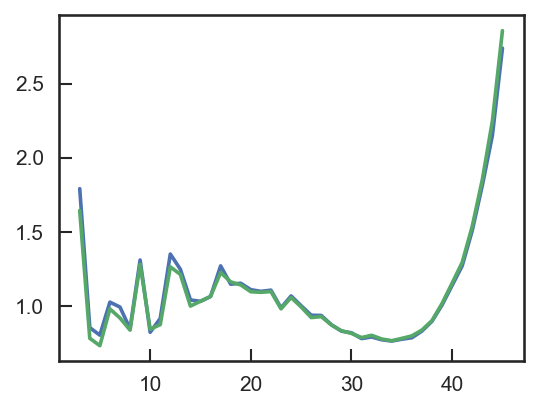

In [20]:
izz=2;

plt.plot(PS_altered[izz])
plt.plot(PS_EoS[izz])

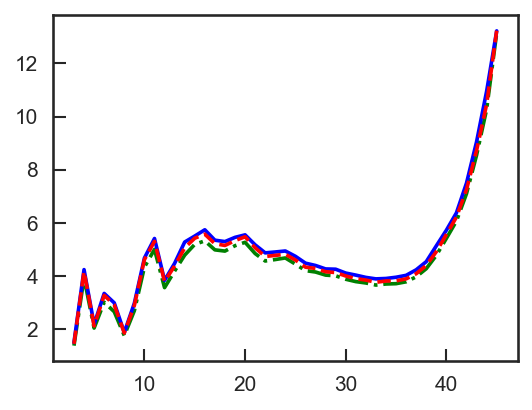

In [21]:
#try to predict PS from param diff

izz=4;

dervec = np.sum(np.array([dp * params_EoS[astro_params_vary_EoS[i]].deriv_PS['CDM'] 
                   for (i,dp) in enumerate(real_param_variations)]),axis=0)

PS_altered_pred = PS_EoS + dervec

plt.plot(PS_EoS[izz],'g-.')
plt.plot(PS_altered_pred[izz],'b')
plt.plot(PS_altered[izz],'r--')

In [22]:
print(len(dervec),len(PS_EoS), len(PS_altered))
print(len(params_EoS[astro_params_vary_EoS[0]].PS_fid),len(params_EoS[astro_params_vary_EoS[0]].deriv_PS['CDM']) )

23 23 23
23 23


In [23]:
#Same for EOS OPT (Munoz+21)

PS_altered = np.load(data_dir+'EoS_mini_OPT/power_spectrum_fid_21cmsense.npy', allow_pickle=True)

Di_vector = p21fish.make_diff_array(params_EoS, PS_altered, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=0.5, k_max=1, 
                                                     z_min=5.7, z_max=30., 
                                                     sigma_mod_frac=0.2,
                                                     add_sigma_poisson=True)

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

param_variations = np.dot(Finv_PS,Di_vector)


for il,label in enumerate(fid_labels):
    print(f'Change in {label} : {param_variations[il]} vs real {real_param_variations[il]}')
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/julian/Dropbox/Research/21/21cmFAST_ETHOS/21cmfish/examples/data/EoS_mini_OPT/power_spectrum_fid_21cmsense.npy'

In [56]:
#True changes are known:

fid_params_OPT = np.array([-1.5e+00,  5.00e-01, -1.20e+00, -3.00e-01, -1.75e+00,  0.00e+00,
       -2.25e+00,  4.05e+01,  2.00e+02,  2.00e+00])

real_param_variations = fid_params_OPT-fid_params

for il,label in enumerate(fid_labels):
    print(f'Change in {label} : {param_variations[il]} vs real {real_param_variations[il]}')

Change in $\log_{10}f_{\star,10}$ : 0.23260493951011085 vs real -0.25
Change in $\alpha_\star^{II}$ : 1.8193608755827881 vs real 0.0
Change in $\log_{10}f_\mathrm{esc,10}$ : -0.34849109067312156 vs real 0.15000000000000013
Change in $\alpha_\mathrm{esc}^{II}$ : -1.5926142653652846 vs real 0.0
Change in $\log_{10}f_\mathrm{\star,7}$ : 7.366415627913284 vs real 0.75
Change in $\alpha_\star^{III}$ : 9.411434502608586 vs real 0.0
Change in $\log_{10}f_\mathrm{esc,7}$ : -0.6143445816401822 vs real -0.8999999999999999
Change in $\log_{10}L_X$ : 0.01243799969144277 vs real 0.0
Change in $\nu_X$ : -135.20234247991357 vs real -300.0
Change in $A_\mathrm{LW}$ : 62.291111496366284 vs real 0.0


In [42]:
##and for different ICs

#Now read an alternative parameter set, close by
KMINALT=0.1
KMAXALT=0.99
SIGMAP=0.2
ZMINALT=5.7

##params_use = params_EoS
params_use = params_EoS_pess

Fij_matrix_PS_KMIN, Finv_PS_KMIN = p21fish.make_fisher_matrix(params_use, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=KMINALT, k_max=KMAXALT, 
                                                     z_min=ZMINALT, z_max=30., 
                                                     sigma_mod_frac=SIGMAP,
                                                     add_sigma_poisson=True)


PS_altered = np.load(data_dir+'EoS_mini_vary_new_ICs/power_spectrum_fid_21cmsense.npy', allow_pickle=True)

Di_vector = p21fish.make_diff_array(params_use, PS_altered, fisher_params=astro_params_vary_EoS, 
                                                     hpeak=0.0, obs='PS',
                                                     k_min=KMINALT, k_max=KMAXALT, 
                                                     z_min=ZMINALT, z_max=30., 
                                                     sigma_mod_frac=SIGMAP,
                                                     add_sigma_poisson=True)

fid_params = np.array([astro_params_fid[param] for param in params_EoS])
fid_labels = np.array([p21fish.astro_params_labels[param] for param in params_EoS])

param_variations = np.dot(Finv_PS_KMIN,Di_vector)

fid_params_alt = np.array([-1.18,  5.60e-01, -1.43, -3.30e-01, -2.44,  0.11,
       -1.25,  4.051e+01,  4.9629e+02,  3.22e+00])

real_param_variations = fid_params_alt-fid_params

for il,label in enumerate(fid_labels):
    print('Change in {:s} : {:.3f} vs real {:.3f}, Nsig={:.2f}'.format(label,param_variations[il],real_param_variations[il],(param_variations[il]-real_param_variations[il])/np.sqrt(Finv_PS_KMIN[il,il])) )
    
    


PS shape: (20, 24)
PS shape: (20, 24)
Change in $\log_{10}f_{\star,10}$ : -0.091 vs real 0.070, Nsig=-0.26
Change in $\alpha_\star^{II}$ : -0.079 vs real 0.060, Nsig=-0.25
Change in $\log_{10}f_\mathrm{esc,10}$ : 0.110 vs real -0.080, Nsig=0.29
Change in $\alpha_\mathrm{esc}^{II}$ : 0.034 vs real -0.030, Nsig=0.13
Change in $\log_{10}f_\mathrm{\star,7}$ : -0.218 vs real 0.060, Nsig=-0.21
Change in $\alpha_\star^{III}$ : -0.262 vs real 0.110, Nsig=-0.22
Change in $\log_{10}f_\mathrm{esc,7}$ : 0.133 vs real 0.100, Nsig=0.03
Change in $\log_{10}L_X$ : 0.078 vs real 0.010, Nsig=0.16
Change in $\nu_X$ : -4.337 vs real -3.710, Nsig=-0.01
Change in $A_\mathrm{LW}$ : 0.462 vs real 1.220, Nsig=-0.11


## Add a prior

E.g. [Park+2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.484..933P/abstract) find $\sigma(\alpha_\star^{II}) \approx 0.07$.

To add a prior, we can add 1/$\sigma^2$ to the diagonal element for that parameter (e.g. [Coe 2009](arXiv:0906.4123))

ALPHA_STAR is at index=1


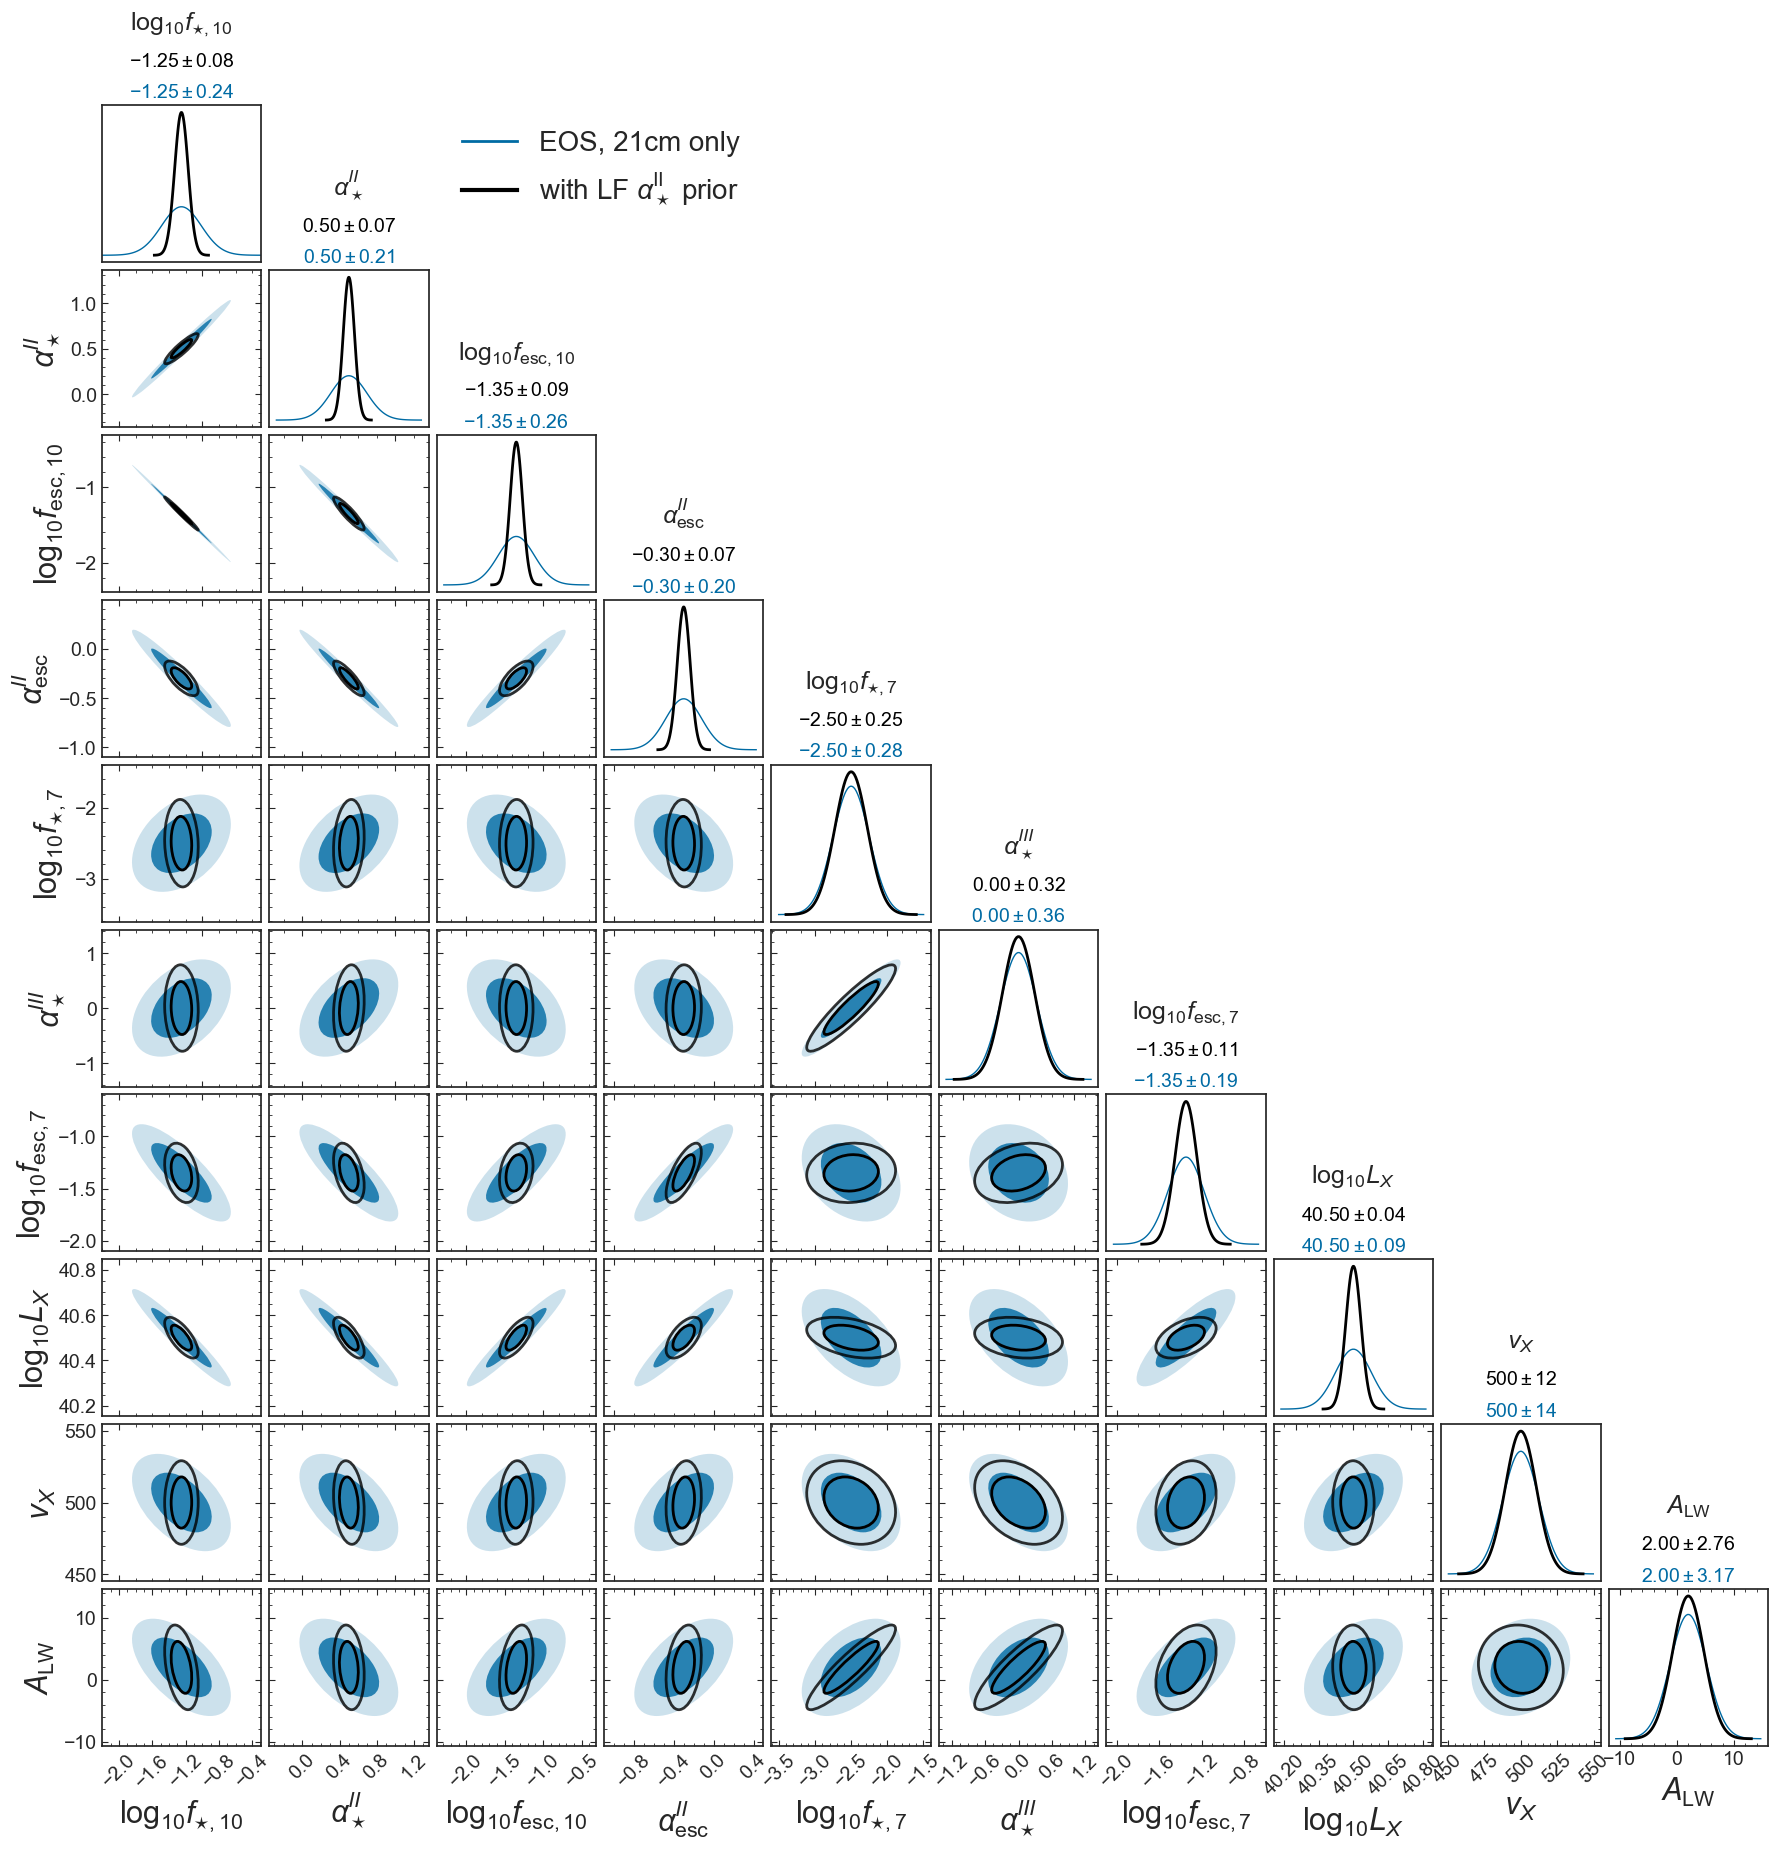

In [10]:
sigma_alpha_star_II = 0.07
idx_alpha_star = list(params_EoS).index("ALPHA_STAR")
print(f'ALPHA_STAR is at index={idx_alpha_star}')
Fij_matrix_PS_alpha_star_prior = Fij_matrix_PS.copy()
Fij_matrix_PS_alpha_star_prior[idx_alpha_star,idx_alpha_star] += 1/sigma_alpha_star_II**2.

Finv_alpha_star_prior = np.linalg.inv(Fij_matrix_PS_alpha_star_prior)

fig, ax = plt.subplots(len(fid_params), len(fid_params), figsize=(18,18))
cols = [col_mod, col_alpha]

for i, cov in enumerate([Finv_PS, Finv_alpha_star_prior]):

    col = cols[i]    
    if i == 0:
        # No prior
        resize_lims=True
        ellipse_color=col
        ellipse_kwargs=[{'alpha':0.8},{'alpha':0.2}]
        plot1D_kwargs={'c':col, 'lw':1}
    else:
        # with prior
        ls='solid'
        resize_lims=False
        ellipse_color='None'
        ellipse_kwargs=[{'edgecolor':col,'lw':2,'ls':ls},
                      {'edgecolor':col,'lw':2,'ls':ls,'alpha':0.8}]
        plot1D_kwargs={'c':col, 'lw':2, 'ls':ls}
        
    p21fish.plot_triangle(params=astro_params_vary_EoS, 
                          fiducial=fid_params,
                          labels=fid_labels,
                          cov=cov,
                          ellipse_color=ellipse_color,
                          ellipse_kwargs=ellipse_kwargs,
                          plot1D_kwargs=plot1D_kwargs,
                          resize_lims=resize_lims,
                          title_fontsize=14,
                          xlabel_kwargs={'labelpad': 5, 'fontsize':22},
                          ylabel_kwargs={'labelpad': 5, 'fontsize':22},
                          ax=ax, fig=fig);

    p21fish.title_double_ellipses(axes=ax, labels=fid_labels,
               med=fid_params, sigma=np.sqrt(cov.diagonal()),
               title_fontsize=18, title_pad=55,
               vspace=i/5,
               color=col
               )

no_prior = mlines.Line2D([], [], color=col_mod, lw=2, label='EOS, 21cm only')
w_prior  = mlines.Line2D([], [], color=col_alpha, lw=3, ls=ls, label=r'with LF $\alpha_\star^\mathrm{II}$ prior')

ax[0,2].legend(handles=[no_prior, w_prior], loc='upper left', fontsize=20)

plt.savefig(examples_dir+'corner_EoS_mini_fisher_ALPHA_STAR_prior.png', bbox_inches='tight')

## Pessimistic case

In [11]:
Fij_matrix_PS_pess, Finv_PS_pess = p21fish.make_fisher_matrix(params_EoS_pess, 
                                                             fisher_params=astro_params_vary_EoS, 
                                                             hpeak=0.0, obs='PS',
                                                             k_min=0.1, k_max=1, 
                                                             z_min=5.7, z_max=30., 
                                                             sigma_mod_frac=0.2,
                                                             add_sigma_poisson=True) 

PS shape: (20, 24)


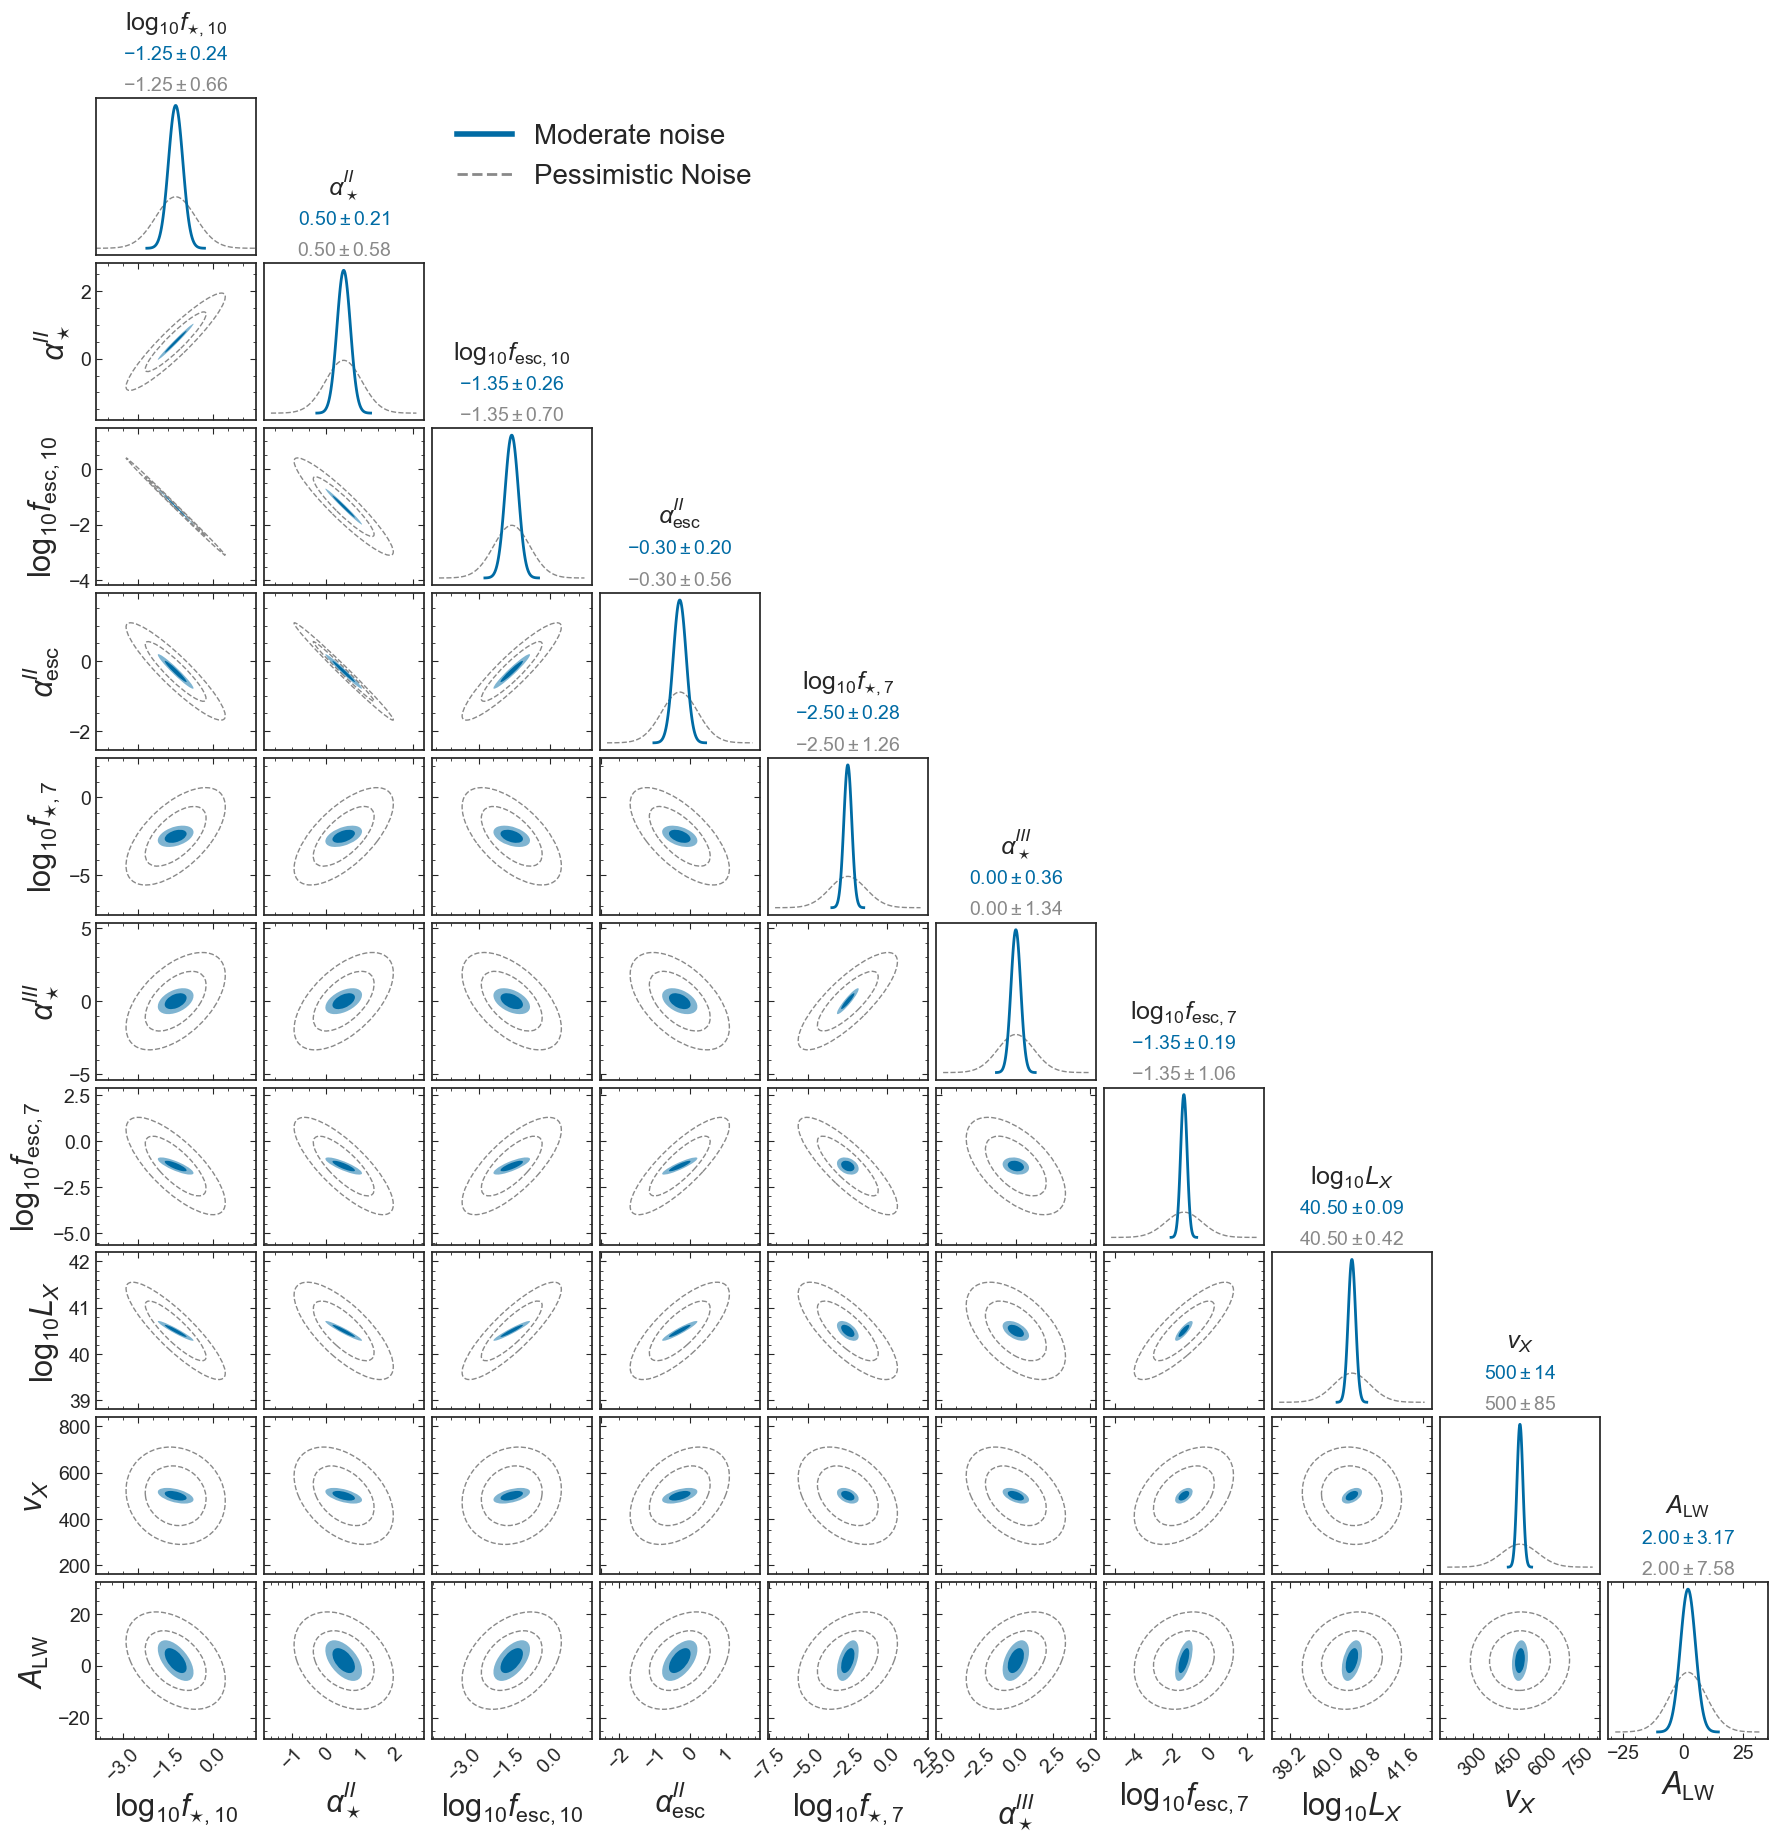

In [12]:
fig, ax = plt.subplots(len(fid_params), len(fid_params), figsize=(18,18))
cols = [col_pess, col_mod]

for i, cov in enumerate([Finv_PS_pess, Finv_PS]):

    col = cols[i]    
    if i == 0:
        resize_lims=True
        ellipse_color='None'
        ellipse_kwargs=[{'edgecolor':col,'lw':1,'ls':'dashed'},
                      {'edgecolor':col,'lw':1,'ls':'dashed','alpha':1}]
        plot1D_kwargs={'c':col, 'lw':1, 'ls':'dashed'}
    else:
        ls='solid'
        resize_lims=False
        ellipse_color=col
        ellipse_kwargs=[{},{'alpha':0.5}]
        plot1D_kwargs={'c':col, 'lw':2}
        
    p21fish.plot_triangle(params=astro_params_vary_EoS, 
                          fiducial=fid_params,
                          labels=fid_labels,
                          cov=cov,
                          ellipse_color=ellipse_color,
                          ellipse_kwargs=ellipse_kwargs,
                          plot1D_kwargs=plot1D_kwargs,
                          resize_lims=resize_lims,
                          title_fontsize=14,
                          xlabel_kwargs={'labelpad': 5, 'fontsize':22},
                          ylabel_kwargs={'labelpad': 5, 'fontsize':22},
                          ax=ax, fig=fig);

    p21fish.title_double_ellipses(axes=ax, labels=fid_labels,
               med=fid_params, sigma=np.sqrt(cov.diagonal()),
               title_fontsize=18, title_pad=50,
               vspace=i/5, color=col)

no_prior = mlines.Line2D([], [], color=col_pess, lw=2, ls='dashed', label='Pessimistic Noise')
w_prior  = mlines.Line2D([], [], color=col_mod, lw=4, label=r'Moderate noise')

ax[0,2].legend(handles=[w_prior, no_prior], loc='upper left', fontsize=20)

plt.savefig(examples_dir+'corner_EoS_mini_fisher_pessimistic.png', bbox_inches='tight')

### S/N

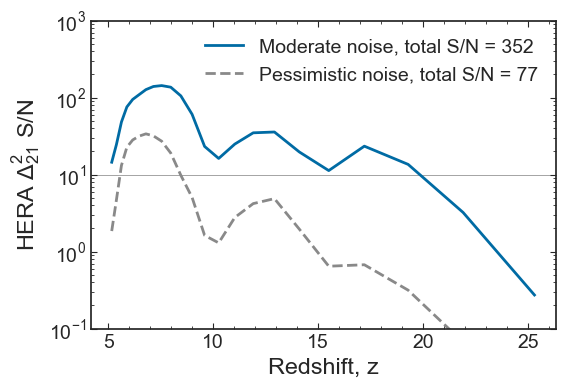

In [13]:
param_test = params_EoS['ALPHA_ESC']
param_test_pess = params_EoS_pess['ALPHA_ESC']

SNR = np.zeros((len(param_test.PS_z_HERA),2))
for i in range(len(param_test.PS_z_HERA)):
    PS     = np.interp(param_test.PS_err[i]['k']*0.7, 
                       param_test.PS['CDM']['ALPHA_ESC=-0.3'][i]['k'],
                       param_test.PS['CDM']['ALPHA_ESC=-0.3'][i]['delta'])
    
    PS_err = np.array([param_test.PS_err[i]['err_mod'],
                        param_test_pess.PS_err[i]['err_mod']])

    SNR[i] = np.sqrt(np.sum((PS/PS_err)**2., axis=1))


plt.figure(figsize=(6,4))
labels = ['Moderate','Pessimistic']
cols = [col_mod, col_pess]
lss  = ['solid', 'dashed']
for i, s in enumerate(SNR.T):
    SNR_total = np.sqrt(np.sum(s**2.)) # ~300
    plt.plot(param_test.PS_z_HERA, s, c=cols[i], ls=lss[i], label=f'{labels[i]} noise, total S/N = {SNR_total:.0f}')
plt.xlabel('Redshift, z')
plt.ylabel('HERA $\Delta_{21}^2$ S/N')
# plt.xticks(np.arange(4,26,2))

plt.axhline(10., lw=0.5, ls='solid', c='0.5', zorder=0)
plt.legend()
# plt.grid(alpha=0.5, lw=0.5)
# plt.ylim(-1,50)
plt.ylim(1e-1,1e3)

plt.yscale('log')
plt.savefig(examples_dir+'SNR_EoS.pdf', bbox_inches='tight')

# Comparison to Park+19

Compare Fisher matrix with [Park+2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.484..933P/abstract) fiducial to their MCMC (21cm power spectrum only)

In [7]:
output_dir_Park19 = data_dir+'Park19/'
PS_err_dir_Park19 = noise_dir+'21cmSense_noise_Park19/'
        
astro_params_vary_Park19, astro_params_fid_Park19 = p21fish.get_params_fid(
                                                    config_file=p21fish.base_path+'21cmFAST_config_files/Park19.config')

# Reorder to match Park+19
astro_params_vary_Park19 = ['F_STAR10', 'ALPHA_STAR',
                             'F_ESC10', 'ALPHA_ESC', 
                             'M_TURN', 't_STAR', 
                             'L_X', 'NU_X_THRESH']

In [8]:
# Load parameters
params_Park19 = {}
for param in astro_params_vary_Park19:
        
    params_Park19[param] = p21fish.Parameter(param=param, 
                                             output_dir=output_dir_Park19,
                                             HII_DIM=128, BOX_LEN=250,
                                             min_redshift=5.9,
                                             PS_err_dir=PS_err_dir_Park19,
                                             clobber=False, Park19='real',
                                             vb=False)

########### fisher set up for F_STAR10
Fiducial: F_STAR10=-1.3
########### fisher set up for ALPHA_STAR
Fiducial: ALPHA_STAR=0.5
########### fisher set up for F_ESC10
Fiducial: F_ESC10=-1.0
########### fisher set up for ALPHA_ESC
Fiducial: ALPHA_ESC=-0.5
########### fisher set up for M_TURN
Fiducial: M_TURN=8.7
########### fisher set up for t_STAR
Fiducial: t_STAR=0.5
########### fisher set up for L_X
Fiducial: L_X=40.5
########### fisher set up for NU_X_THRESH
Fiducial: NU_X_THRESH=500.0


## Make Fisher matrix

In [11]:
Fij_matrix_PS_Park19, Finv_PS_Park19 = p21fish.make_fisher_matrix(params_Park19, 
                                                                fisher_params=astro_params_vary_Park19, 
                                                                hpeak=0.0, obs='PS',
                                                                k_min=0.1, k_max=1, 
                                                                z_min=5.7, z_max=30., 
                                                                sigma_mod_frac=0.2,
                                                                cosmo_key='CDM',
                                                                add_sigma_poisson=True) 

fid_params_Park19 = np.array([astro_params_fid_Park19[param] for param in params_Park19])
fid_labels_Park19 = np.array([p21fish.astro_params_labels[param] for param in params_Park19])

NameError: name 'params_Park19' is not defined

## Load Park19 chains and compare

Load their 21cm-only chains and compare the contours

### Plot 1+2 sigma CI

['F_STAR10' 'ALPHA_STAR' 'F_ESC10' 'ALPHA_ESC' 'M_TURN' 't_STAR' 'L_X'
 'E0']


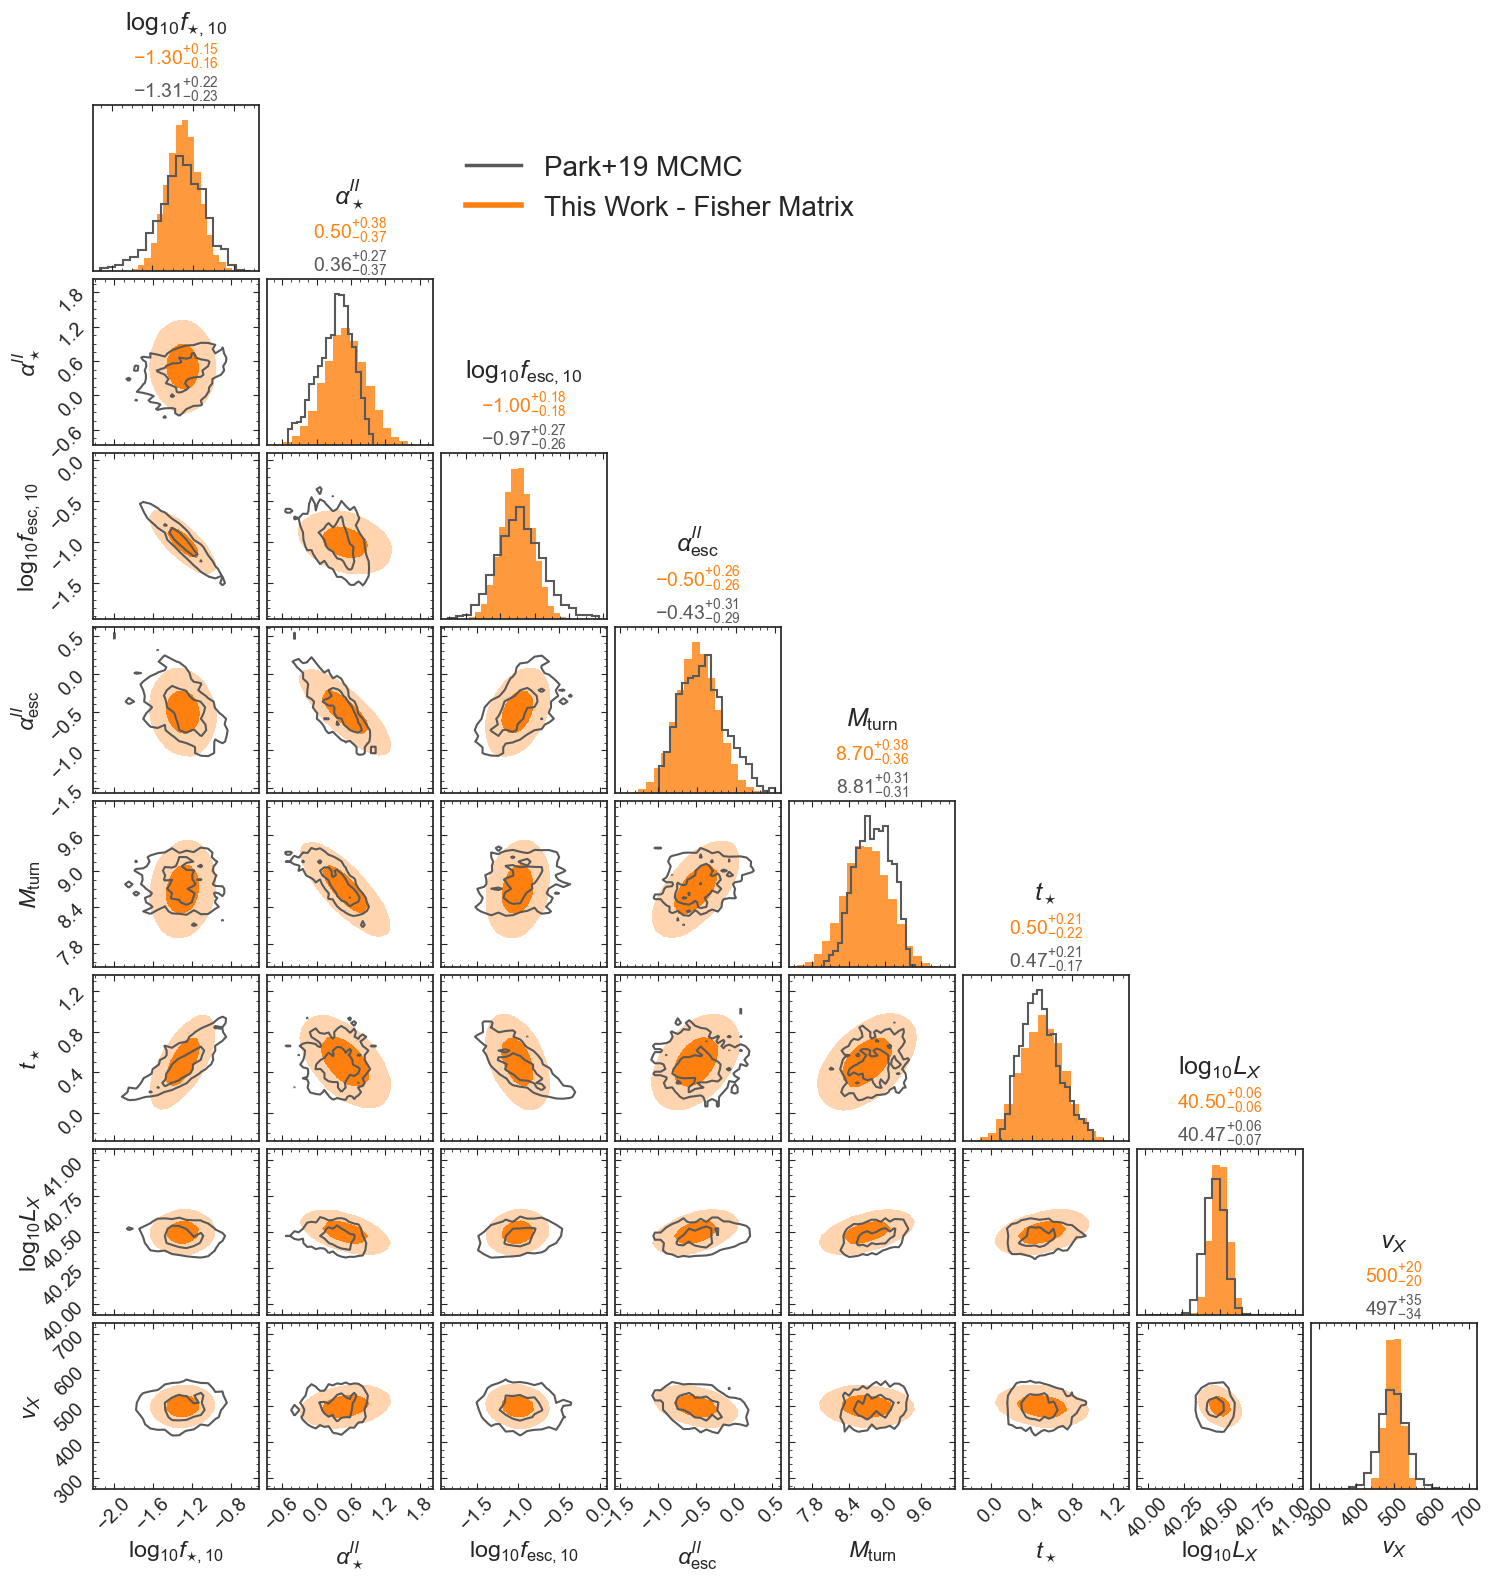

In [11]:
Park19_chains = np.load(f'{output_dir_Park19}Park19_chains.npz')
print(Park19_chains['params'])

# Make posteriors from the covariance matrix
mean = fid_params_Park19.copy()
cov  = Finv_PS_Park19.copy()
fisher_chain = np.random.multivariate_normal(mean, cov, size=10000)

# Corner plot
fig = plt.figure(figsize=(15,15))

colors = [col_mcmc,col_P19]
lws = [1.5,3]

# Plot 2 sigma confidence interval (https://corner.readthedocs.io/en/latest/pages/sigmas.html)
levels = 1.0 - np.exp(-0.5 * np.array([1,2,]) ** 2)
    
for cc, chain in enumerate([Park19_chains['chains'],fisher_chain]):

    if cc == 0:
        # MCMC
        ls='solid'
        lw=lws[cc]
        hist_kwargs = {'lw':lw,'ls':ls,'density':True}
        color=colors[cc]
        smooth=None
        fill_contours    = False
        no_fill_contours = True
        contour_kwargs = {'linewidths':lw,'linestyles':ls}
        contourf_kwargs={}
        zorder=10
    else:
        # fisher
        ls='solid'
        lw=lws[cc]
        hist_kwargs = {'lw':lw,'density':True,'histtype':'stepfilled', 'alpha':0.8}
        fill_contours=True
        no_fill_contours=False
        color=colors[cc]
        smooth=1
        contour_kwargs = {'linewidths':0.}
        contourf_kwargs = {}
        zorder=0

    corner.corner(chain, fig=fig,              
                labels=fid_labels_Park19,
                smooth=smooth,
                color=color, use_math_text=True,
                plot_datapoints=False, plot_density=False, 
                no_fill_contours=no_fill_contours, fill_contours=fill_contours,
                hist_kwargs=hist_kwargs,
                contour_kwargs=contour_kwargs,contourf_kwargs=contourf_kwargs,
                levels=levels,
                range=[1,1,1,1,1,1,(40.,41.),(300,700)], # throws out a couple of outlier points in the chains [better for Lx]
                show_titles=True,
                zorder=zorder
                );

    # Format the quantile display
    ax = np.reshape(fig.axes, (chain.shape[1],chain.shape[1]))

    p21fish.title_double_ellipses(axes=ax, labels=fid_labels_Park19,
                   chain=chain, 
                   med=None, sigma=None,
                   title_fontsize=18, title_pad=55,
                   vspace=cc/5,
                   color=color
                   )

lab_P19 = mlines.Line2D([], [], color=col_mcmc, ls='solid', lw=lws[0]+1, label='Park+19 MCMC')
lab_TW  = mlines.Line2D([], [], color=col_P19, lw=lws[1]+1, label=r'This Work - Fisher Matrix')

fig.get_axes()[2].legend(handles=[lab_P19, lab_TW], loc='center left', fontsize=20)


plt.savefig(examples_dir+'corner_Park19_fisher_compare_2sigma.png', bbox_inches='tight')

### Plot 1 sigma CI

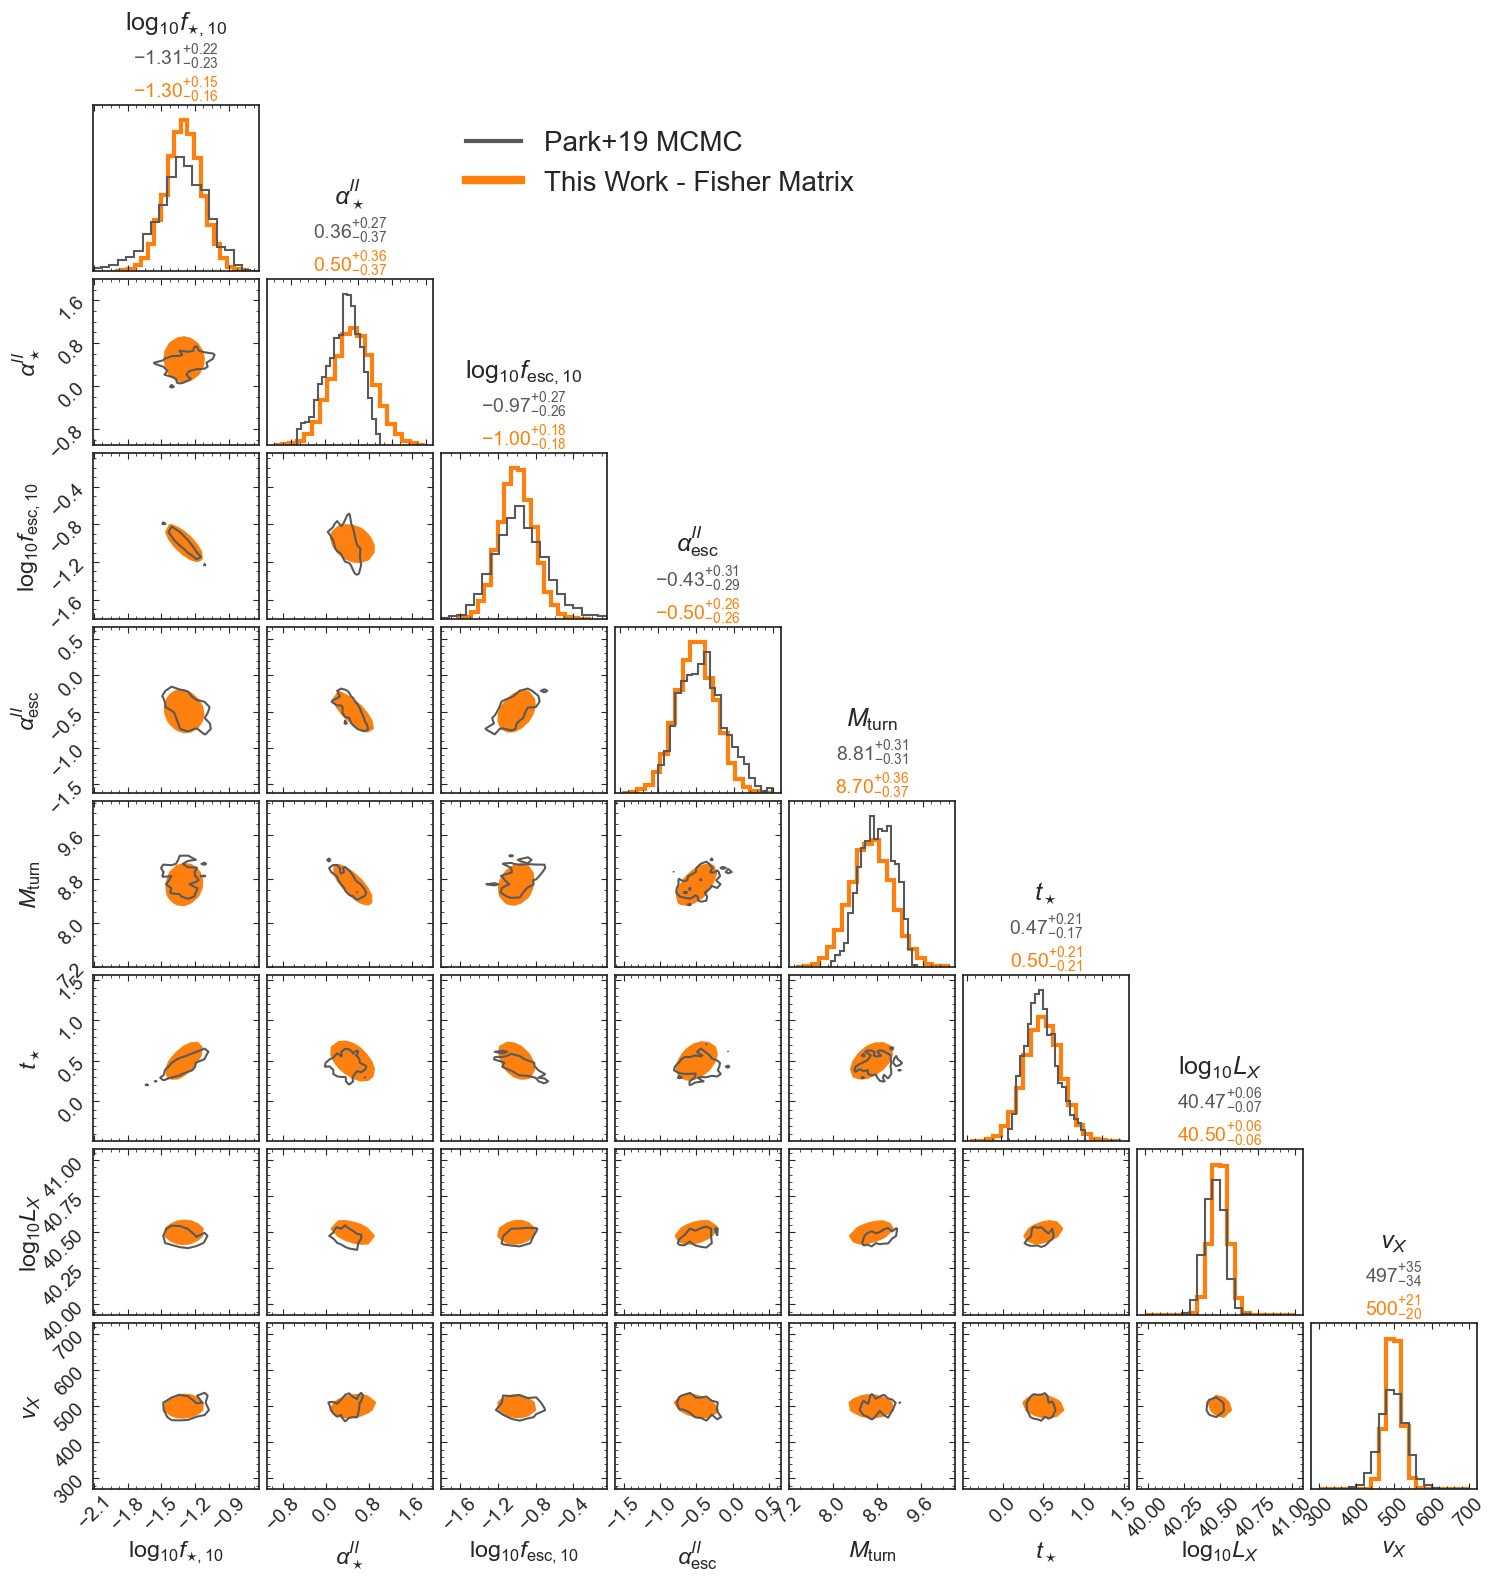

In [20]:
# 1 sigma Corner plot
fig = plt.figure(figsize=(15,15))

colors = [col_P19,col_mcmc]
lws = [3,1.5]
lss = ['solid','solid']

# Plot 2 sigma confidence interval (https://corner.readthedocs.io/en/latest/pages/sigmas.html)
levels = 1.0 - np.exp(-0.5 * np.array([1,]) ** 2)

for cc, chain in enumerate([fisher_chain, Park19_chains['chains']]):
    
    ls=lss[cc]
    lw=lws[cc]
    color=colors[cc]
    
    if cc == 1:
        hist_kwargs = {'lw':lw,'ls':ls,'density':True}
        contour_kwargs = {'linewidths':lw,'linestyles':ls}        
        fill_contours = False
        smooth=None
        no_fill_contours=True
    else:  
        hist_kwargs = {'lw':lw,'density':True}
        contour_kwargs={}
        fill_contours = True
        no_fill_contours=False
        smooth=1

    contourf_kwargs={}

    corner.corner(chain, fig=fig,              
                labels=fid_labels_Park19,
                smooth=smooth,
                color=color, use_math_text=True,
                plot_datapoints=False, plot_density=False, 
                no_fill_contours=no_fill_contours, fill_contours=fill_contours,
                hist_kwargs=hist_kwargs,
                contour_kwargs=contour_kwargs,contourf_kwargs=contourf_kwargs,
                levels=levels,
                range=[1,1,1,1,1,1,(40.,41.),(300,700)], # throws out a couple of outlier points in the chains [better for Lx]
                show_titles=True,
                );
    
    
    # Format the quantile display
    ax = np.reshape(fig.axes, (chain.shape[1],chain.shape[1]))

    p21fish.title_double_ellipses(axes=ax, labels=fid_labels_Park19,
                   chain=chain, 
                   med=None, sigma=None,
                   title_fontsize=18, title_pad=55,
                   vspace=cc/5,
                   color=color
                   )

lab_P19 = mlines.Line2D([], [], color=col_mcmc, ls=lss[1], lw=2*lws[1], label='Park+19 MCMC')
lab_TW  = mlines.Line2D([], [], color=col_P19,  ls=lss[0], lw=2*lws[0], label=r'This Work - Fisher Matrix')

fig.get_axes()[2].legend(handles=[lab_P19, lab_TW], loc='upper left', fontsize=20)

plt.savefig(examples_dir+'corner_Park19_fisher_compare_1sigma.png', bbox_inches='tight')

# Adding a new parameter

If you want to add your own new parameter, you should:

1. Create lightcones varying that parameter.
    1. Create a config file for the parameters you want to change (take one of the examples in `../21cmFAST_config_files/` and replace the `astro_params_vary` list with your list of new parameters.
    2. Note that the fiducial parameter value for your new parameter will be the 21cmFAST default unless the fiducial value is specified in the config file. If you want a non-default fiducial parameter value you will need to create a new set of lightcones with your parameter's fiducial included in `astro_params`.
    3. Create the lightcones using `scripts/make_lightcones_for_fisher.py`
2. Load your new parameter by adding it to the dictionary [as above](#EOS21)

See more details on running `scripts/make_lightcones_for_fisher.py` in the [docs](https://21cmfish.readthedocs.io/en/latest/usage.html) 